In [1]:
import torch
torch.cuda.is_available()

True

In [3]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


In [5]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [ ]:
y.backward()

In [14]:
x.grad

tensor([6.])

In [16]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)

tensor([1., 1., 1.])


In [20]:
import numpy as np

def sigmoidGradient(x):
    sg = 1 / (1 + np.exp(-x))
    return sg * (1 - sg)

x = torch.tensor([1., 2.], requires_grad=True)

y = x.sigmoid()

y.backward(torch.ones_like(y))

print(x.grad)

print(sigmoidGradient(1.), sigmoidGradient(2.))


tensor([0.1966, 0.1050])
0.19661193324148185 0.10499358540350662


In [28]:
x = torch.tensor([1., 2.], requires_grad=True)

y = x

y.backward(torch.ones_like(y))

print(x.grad)

tensor([1., 1.])


In [24]:
# f'(x) = 1

In [32]:
# Relu gradient: for x <= 0 -> f'(x) = 0, otherwise 1
x = torch.tensor([-1., 2.], requires_grad=True)

y = torch.relu(x)

y.backward(torch.ones_like(y))

print(x.grad)

tensor([0., 1.])


tensor([4.5396e-05, 6.8275e-05, 1.0268e-04, 1.5442e-04, 2.3222e-04, 3.4919e-04,
        5.2502e-04, 7.8924e-04, 1.1861e-03, 1.7818e-03, 2.6752e-03, 4.0128e-03,
        6.0109e-03, 8.9859e-03, 1.3393e-02, 1.9870e-02, 2.9284e-02, 4.2734e-02,
        6.1471e-02, 8.6615e-02, 1.1855e-01, 1.5595e-01, 1.9475e-01, 2.2796e-01,
        2.4741e-01, 2.4741e-01, 2.2796e-01, 1.9475e-01, 1.5595e-01, 1.1855e-01,
        8.6615e-02, 6.1471e-02, 4.2734e-02, 2.9284e-02, 1.9870e-02, 1.3393e-02,
        8.9859e-03, 6.0109e-03, 4.0128e-03, 2.6752e-03, 1.7818e-03, 1.1861e-03,
        7.8924e-04, 5.2502e-04, 3.4919e-04, 2.3222e-04, 1.5442e-04, 1.0268e-04,
        6.8275e-05, 4.5396e-05], dtype=torch.float64)


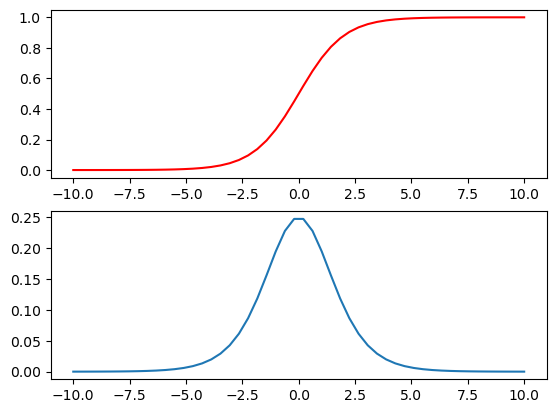

In [56]:
import matplotlib.pyplot as plt

def sigmoidPlot():
    points = np.linspace(-10,10)
    x = torch.tensor(points, requires_grad=True)
    
    y = x.sigmoid()
    
    y.backward(torch.ones_like(y))

    plt.subplot(2, 1, 1)
    plt.plot(points, y.detach().numpy(), color='red')
    plt.subplot(2, 1, 2)
    plt.plot(points, x.grad.detach().numpy())
    
    print(x.grad)

sigmoidPlot()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)


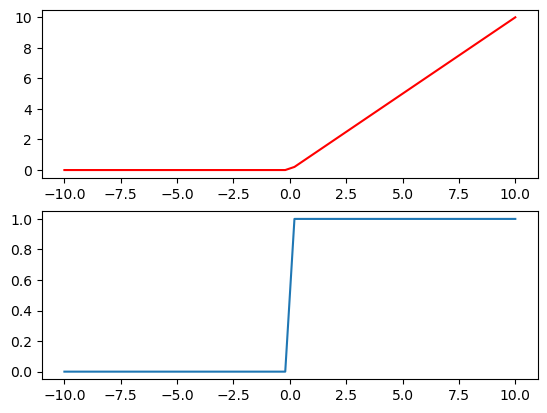

In [58]:
def reluPlot():
    points = np.linspace(-10,10)

    x = torch.tensor(points, requires_grad=True)
    
    y = torch.relu(x)
    
    y.backward(torch.ones_like(y))

    plt.subplot(2, 1, 1)
    plt.plot(points, y.detach().numpy(), color='red')
    plt.subplot(2, 1, 2)
    plt.plot(points, x.grad.detach().numpy())
    
    print(x.grad)

reluPlot()

tensor([8.2446e-09, 1.8651e-08, 4.2191e-08, 9.5444e-08, 2.1591e-07, 4.8843e-07,
        1.1049e-06, 2.4995e-06, 5.6543e-06, 1.2791e-05, 2.8935e-05, 6.5455e-05,
        1.4806e-04, 3.3492e-04, 7.5748e-04, 1.7127e-03, 3.8703e-03, 8.7340e-03,
        1.9649e-02, 4.3901e-02, 9.6586e-02, 2.0545e-01, 4.0705e-01, 7.0221e-01,
        9.5948e-01, 9.5948e-01, 7.0221e-01, 4.0705e-01, 2.0545e-01, 9.6586e-02,
        4.3901e-02, 1.9649e-02, 8.7340e-03, 3.8703e-03, 1.7127e-03, 7.5748e-04,
        3.3492e-04, 1.4806e-04, 6.5455e-05, 2.8935e-05, 1.2791e-05, 5.6543e-06,
        2.4995e-06, 1.1049e-06, 4.8843e-07, 2.1591e-07, 9.5444e-08, 4.2191e-08,
        1.8651e-08, 8.2446e-09], dtype=torch.float64)


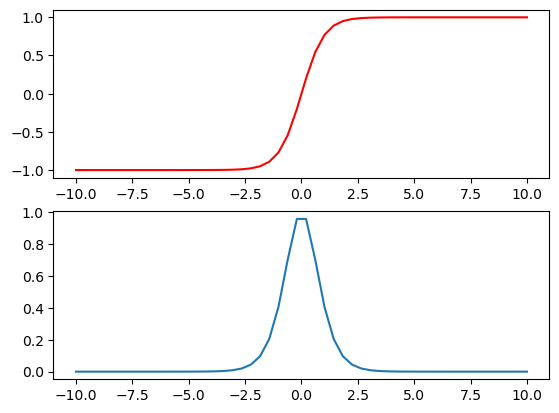

In [60]:
def tanhPlot():
    points = np.linspace(-10,10)

    x = torch.tensor(points, requires_grad=True)
    
    y = torch.tanh(x)
    
    y.backward(torch.ones_like(y))

    plt.subplot(2, 1, 1)
    plt.plot(points, y.detach().numpy(), color='red')
    plt.subplot(2, 1, 2)
    plt.plot(points, x.grad.detach().numpy())
    
    print(x.grad)

tanhPlot()

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], dtype=torch.float64)


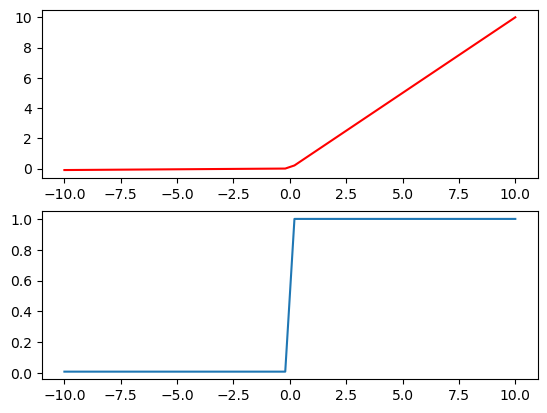

In [68]:
def leakyReluPlot():
    points = np.linspace(-10,10)

    x = torch.tensor(points, requires_grad=True)
    
    y = torch.nn.functional.leaky_relu(x)
    
    y.backward(torch.ones_like(y))

    plt.subplot(2, 1, 1)
    plt.plot(points, y.detach().numpy(), color='red')
    plt.subplot(2, 1, 2)
    plt.plot(points, x.grad.detach().numpy())
    
    print(x.grad)

leakyReluPlot()

In [70]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


In [72]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

tensor([0.5705], grad_fn=<SigmoidBackward0>)


In [74]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6664
Epoch [200/1000], Loss: 0.6609
Epoch [300/1000], Loss: 0.6606
Epoch [400/1000], Loss: 0.6606
Epoch [500/1000], Loss: 0.6606
Epoch [600/1000], Loss: 0.6606
Epoch [700/1000], Loss: 0.6606
Epoch [800/1000], Loss: 0.6606
Epoch [900/1000], Loss: 0.6606
Epoch [1000/1000], Loss: 0.6606


In [84]:
perceptron = Perceptron(input_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = torch.tensor([[0.], [1.], [1.], [1.]])

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3261
Epoch [200/1000], Loss: 0.2564
Epoch [300/1000], Loss: 0.2101
Epoch [400/1000], Loss: 0.1773
Epoch [500/1000], Loss: 0.1528
Epoch [600/1000], Loss: 0.1340
Epoch [700/1000], Loss: 0.1190
Epoch [800/1000], Loss: 0.1069
Epoch [900/1000], Loss: 0.0970
Epoch [1000/1000], Loss: 0.0886
